# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Tangonan, Darwin James J.\
_Student No._: 2022-08539\
_Section_: TX3

### Submission Information

_Date and Time Submitted (most recent upload)_: November 16 2024

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: DARWIN JAMES JARDINICO TANGONAN**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation as FuncAni
from IPython.display import HTML

# Constants
hbar = 1.0545718e-34  # Planck's constant over 2*pi in J s
M = 9.109e-31         # mass of electron in kg
L = 1e-8              # length of the box in meters
x0 = L / 2            # initial position
sigma = 1e-10         # standard deviation
kappa = 5e10          # wave number
N = 1000              # number of spatial slices
a = L / N             # spatial step size
h = 1e-18             # time step size, as prescribed

# Spatial grid
x = np.linspace(0, L, N+1)

# define array psi for each timestep,
# and initial wavefunction based on given Psi_0
psi = []
psi.append(np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * kappa * x))

# Coefficients for the Crank-Nicolson method
a1 = 1 + 1j * h * hbar / (2 * M * a**2)
b1 = 1 - 1j * h * hbar / (2 * M * a**2)
a2 = -1j * h * hbar / (4 * M * a**2)
b2 = 1j * h * hbar / (4 * M * a**2)

# Matrix B
B = np.zeros((N+1, N+1), dtype=complex)
for i in range(0, N):
    B[i, i] = b1    # Diagonal,
    B[i, i+1] = b2
    B[i+1, i] = b2  # and Off-diagonal terms
B[N, N] = b1        # extra diagonal term, as there N-1 off diagonal and N diagonal

# Matrix A, follows same code structure as for B
A = np.zeros((N+1, N+1), dtype=complex)
for i in range(0, N):
    A[i, i] = a1
    A[i, i+1] = a2
    A[i+1, i] = a2
A[N, N] = a1

# Inverse Matrix of A
Ainv = np.linalg.inv(A)

# Calculate the next Psi[t]
def evolve_psi(psi_t):
    # solve for psi at next time step, using linear system A psi[t+1] = B psi[t]
    v = np.matmul(B, psi_t)     # first calculate RHS, note matmul was used instead of prescribed equation
    return np.matmul(Ainv, v)   # then, solve for psi[t+1] = A^-1 * v

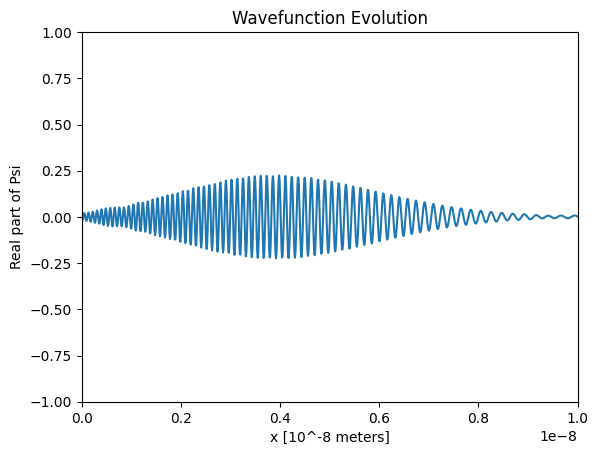

In [57]:
# Solve all Psi, by looping over multiple time steps
for t in range(5000):
    # add new psi[t+1] to the psi array
    psi.append(evolve_psi(psi[t]))

# Animate the wavefunction
fig = plt.figure()
ax = plt.axes(xlim=(0, L), ylim=(-1, 1))
temp, = ax.plot([], [])

ax.set_xlabel('x [10^-8 meters]')
ax.set_ylabel('Real part of Psi')
ax.title.set_text('Wavefunction Evolution')

def update(frame):
    # for each frame, update the y-axis with corresponding psi[t] wavefunction
    temp.set_data(x, np.real(psi[frame]))
    return temp,

ani = FuncAni(fig, update, frames=5000, interval=10, blit=True)
HTML(ani.to_html5_video())

### Analysis of Graph

From the beginning of the evolution, we can see the very tall and thin initial $\psi$ envelope fatten and shorten. This matches our expectations of applying schrodinger's equation and the uncertainty principle, with position uncertainty (max amplitude height) decreasing and momentum uncertainty (width and envelope motion) increasing.

The next noteworthy behavior is when the envelope appears to reach the boundaries. The animation can be interpreted as $\psi$ being reflected, where-in an interference between the original wave and the reflected wave is first observed, and then only the reflected wave is left. This happens since the wavefunction is 0 at the boundaries, equivalent to having infinite potential walls.


Note: If the video is not playing, a copy is saved in the repository